In [1]:
#
# import the SiPM classes
#
from SiPM import *
# for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# z position of the in-plane SiPMs
z_plane = 10
# radius of the cyinder for SiPMs at the side
r_cylinder = 22
# radius of a SiPM - I assume circular SiPMs with a radius to make the area correspond to a 3x3mm2 square.
r_sipm = 1.6925
#wire thickness of anode wire
wire_thickness = 4 *10**-3
#wire spacing of anode wires
wire_spacing = 2.6-wire_thickness
# build geometry
geo = GeoParameters(z_plane=z_plane, r_cylinder=r_cylinder, r_sipm=r_sipm, wire_thickness=wire_thickness, wire_spacing=wire_spacing)

In [3]:
# generate a XAMS geometry with SiPMs in plane above the LXe
list_pos = ([0,(2+r_sipm),z_plane],[0,-(2+r_sipm),z_plane],[(7.4+r_sipm),26,z_plane],[-(7.4+r_sipm),26,z_plane],[(7.4+r_sipm),-26,z_plane],[-(7.4+r_sipm),-26,z_plane],[(22.4+r_sipm),0,z_plane],[-(22.4+r_sipm),0,z_plane])

for i in range(len(list_pos)):
    sipm = SiPM(type="plane",position=list_pos[i],qeff=0.25)
    geo.add_sipm(sipm)


for sip in geo.get_sipms():  
    print(sip.get_location())

[0, 3.6925, 10]
[0, -3.6925, 10]
[9.092500000000001, 26, 10]
[-9.092500000000001, 26, 10]
[9.092500000000001, -26, 10]
[-9.092500000000001, -26, 10]
[24.092499999999998, 0, 10]
[-24.092499999999998, 0, 10]


In [4]:
n_mc = 1000
sims = []
xbins = 2
ybins = 2
xmax = 20
ymax = 20

for x in np.linspace(0,xmax,xbins,endpoint=True):
    for y in np.linspace(0,ymax,ybins,endpoint=True):
        print("simulate @ x= ",x," mm", "simulate @ y= ",y, "mm")
        sim = Simulator(geo=geo,uv_position=[x,y,0],n_mc=n_mc)
        sim.generate_events()
        sims.append(sim)

simulate @ x=  0.0  mm simulate @ y=  0.0 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [0. 0. 0.]
 0  (x,y,z) = ( 0.0,  3.7, 10.0) p(hit) = 0.00125  qe = 0.250
 1  (x,y,z) = ( 0.0, -3.7, 10.0) p(hit) = 0.00150  qe = 0.250
 2  (x,y,z) = ( 9.1, 26.0, 10.0) p(hit) = 0.00025  qe = 0.250
 3  (x,y,z) = (-9.1, 26.0, 10.0) p(hit) = 0.00000  qe = 0.250
 4  (x,y,z) = ( 9.1, -26.0, 10.0) p(hit) = 0.00025  qe = 0.250
 5  (x,y,z) = (-9.1, -26.0, 10.0) p(hit) = 0.00000  qe = 0.250
 6  (x,y,z) = (24.1,  0.0, 10.0) p(hit) = 0.00000  qe = 0.250
 7  (x,y,z) = (-24.1,  0.0, 10.0) p(hit) = 0.00000  qe = 0.250
event generation done
simulate @ x=  0.0  mm simulate @ y=  20.0 mm
generated  0  events
Number of SiPMs =  8  Generated hits from x= [ 0. 20.  0.]
 0  (x,y,z) = ( 0.0,  3.7, 10.0) p(hit) = 0.00025  qe = 0.250
 1  (x,y,z) = ( 0.0, -3.7, 10.0) p(hit) = 0.00000  qe = 0.250
 2  (x,y,z) = ( 9.1, 26.0, 10.0) p(hit) = 0.00100  qe = 0.250
 3  (x,y,z) = (-9.1, 26.0, 10.0) p(hit) = 0.0

In [5]:
"""#some parameters
n_event = 10

#for different uv values
list_n_uv =[]
for i in range(1,5):
    list_n_uv.append(10000*i)
list_recs = np.zeros(len(list_n_uv))
list_recs_fixed = np.zeros(len(list_n_uv))

i=0
#generate reconstructions
for n_uv in list_n_uv:
    recs_fixed = []
    recs = []
    for sim in sims:
        #unfixed n_uv rec
        rec = Reconstruction(sim=sim)
        rec.emulate_events(n_uv=n_uv,n_event=n_event,method="CHI2",plot=False,nbins=1000,range=((-30,30),(-30,30)))
        recs.append(rec)
        
        #fixed n_uv rec
        rec_fixed = Reconstruction(sim=sim)
        rec_fixed.fix_parameter_CHI2(parameter="rate0", fix_value=n_uv)
        rec_fixed.emulate_events(n_uv=n_uv,n_event=n_event,method="CHI2",plot=False,nbins=1000,range=((-30,30),(-30,30)))
        recs_fixed.append(rec_fixed)      
    list_recs[i]=recs
    list_recs_fixed[i]=recs_fixed
    i +=1
"""

recs = []
n_uv = 50000
for sim in sims:
    rec = Reconstruction(sim=sim)
    rec.fix_parameter_CHI2(parameter="rate0", fix_value=n_uv)
    rec.emulate_events(n_uv=n_uv,n_event=10,method="CHI2",plot=False,nbins=1000,range=((-30,30),(-30,30)))
    recs.append(rec)

generated  0  events
reconstruction done
              I       chi2       fval  status  xgen        xr  ygen        yr
0  69818.841924  61.067357  49.857083     1.0   0.0  4.603639   0.0 -1.616681
1  69818.841924  58.181616  41.100535     1.0   0.0  5.920379   0.0 -0.408795
2  69818.841924  59.264908  45.084628     1.0   0.0  5.773595   0.0 -1.049875
3  69818.841924  67.221680  63.347447     1.0   0.0  5.685374   0.0 -2.288179
4  69818.841924  64.770253  56.384964     1.0   0.0  6.507200   0.0  1.270598
5  69818.841924  57.921083  41.963644     1.0   0.0  5.188728   0.0  0.528624
6  69818.841924  72.580254  68.834569     1.0   0.0  6.168684   0.0  1.233130
7  69818.841924  60.319359  47.318702     1.0   0.0  5.752841   0.0 -0.585946
8  69818.841924  63.507296  55.257212     1.0   0.0  6.732925   0.0 -2.597301
9  69818.841924  63.931300  57.940522     1.0   0.0  4.907820   0.0 -2.505095
generated  0  events
reconstruction done
              I       chi2       fval  status  xgen         

xdif
ydif
rdif
phidif
xsig
ysig
rsig
phisig


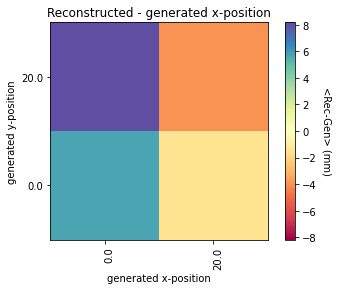

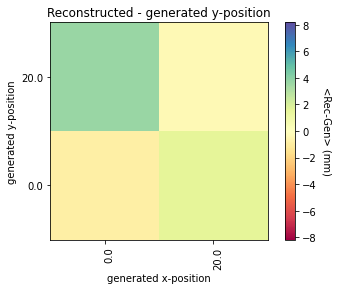

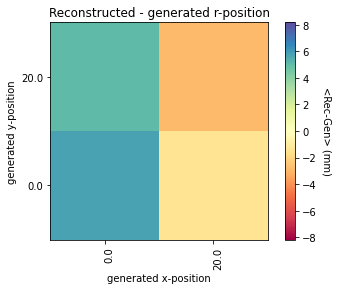

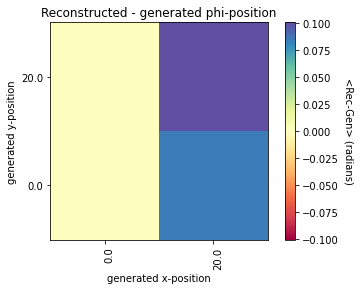

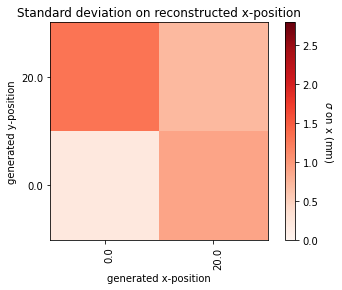

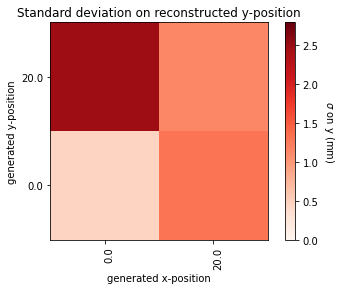

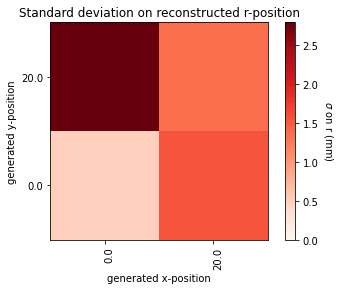

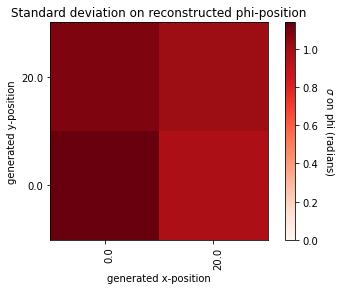

In [6]:
#Take all recs for meta data
ana = Analysis(recs=recs, xsize=xbins, ysize=ybins)

#put relevant data from recs into np arrays
ana.merge()

#plot!
    #possible types: "xdif", "ydif", "rdif", "phidif", "xsig", "ysig", "rsig", "phisig"
ana.plot2d(type = "xdif", cmap ='Spectral')
ana.plot2d(type = "ydif", cmap ='Spectral')
ana.plot2d(type = "rdif", cmap ='Spectral')
ana.plot2d(type = "phidif", cmap ='Spectral')
ana.plot2d(type = "xsig", cmap ='Reds')
ana.plot2d(type = "ysig", cmap ='Reds')
ana.plot2d(type = "rsig", cmap ='Reds')
ana.plot2d(type = "phisig", cmap ='Reds')


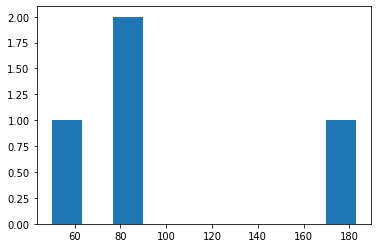

In [7]:
hits_count = []
for rec in recs:
    temp = 0
    for sipm in rec.sim.geo.sipms:
        temp += sipm.get_number_of_hits()
    hits_count.append(temp)
plt.hist(hits_count)
plt.show()

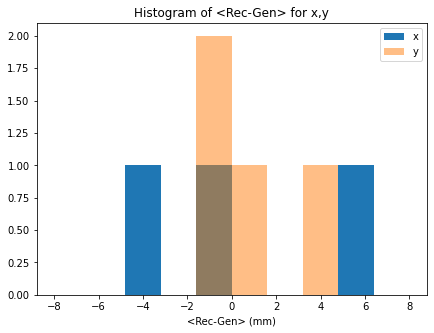

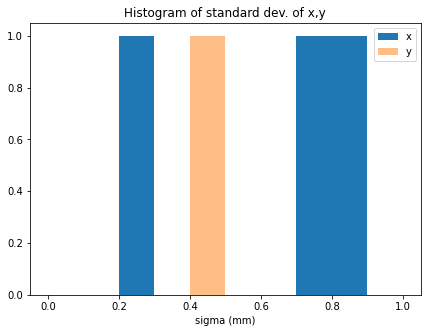

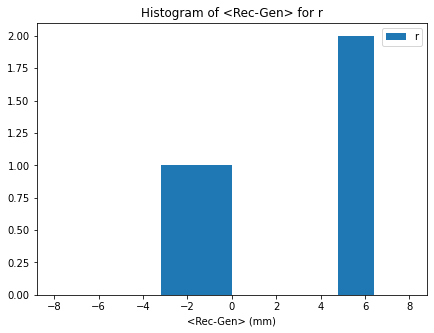

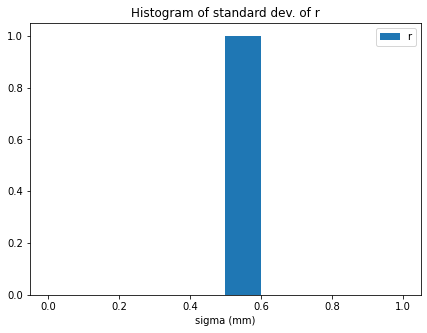

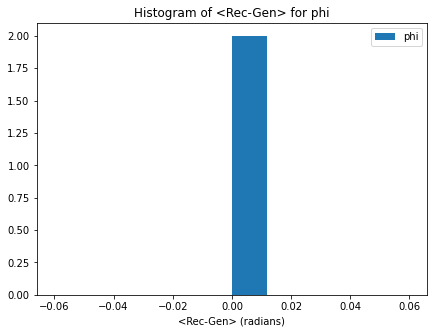

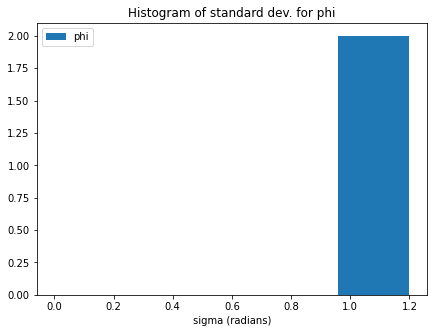

In [8]:
bins = 10

#plot 1d histograms for prevalence of values plotted in above 2d plots
ana.plot(type = "xydif", bins = bins, range = (-8,8))
ana.plot(type = "xysig", bins =bins , range = (0,1))
ana.plot(type = "rdif", bins = bins, range = (-8,8))
ana.plot(type = "rsig", bins =bins , range = (0,1))
ana.plot(type = "phidif", bins =bins, range = (-0.06,0.06))
ana.plot(type = "phisig", bins =bins, range = (0,1.2))


 N(UV) reco =  69818.84192359637  +/- 0.0


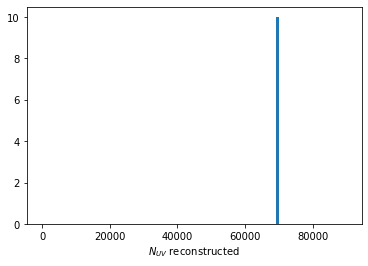

In [9]:
recs[0].plot(type="intensity",range=(0,90000))

generated pos =  [0. 0. 0.]
<xr> =  5.724118426080676  +/- 0.21292404279031973  mm
    rms_x =  0.6733249438285642  mm
<yr> =  -0.8019518896606144  +/- 0.46507796006022234  mm
    rms_y =  1.4707056433351229  mm


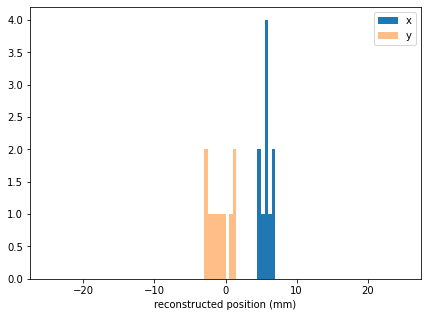

In [10]:
i=0

rec = recs[i]
print('generated pos = ', rec.sim.get_x0())
recs[i].plot(type="res",bins=100,range=(-25,25))